In [1]:
# Loading Libraries
import pandas as pd #Data Manipulation
import numpy as np #Data Manipulation

import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting
sns.set(style='white')

from sklearn import preprocessing #Preprocessing

from scipy.stats import skew, boxcox_normmax #Preprocessing
from scipy.special import boxcox1p #Preprocessing

from sklearn.model_selection import train_test_split #Train/Test Split
from sklearn.linear_model import LogisticRegression #Model

from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics
from sklearn.metrics import roc_auc_score, roc_curve #ROC
from sklearn import model_selection #Cross Validation
from sklearn.feature_selection import RFE, RFECV #Feature Selection

# Data Loading

In [2]:
# Reading Dataset from GitHub repository
hr = pd.read_csv('https://raw.githubusercontent.com/ashomah/HR-Analytics/master/assets/data/turnover.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Preparation
Variables Types and Definitions

In [3]:
# Shape of the data frame
print('Rows:', hr.shape[0], '| Columns:', hr.shape[1])

Rows: 14999 | Columns: 10


In [4]:
# Describe each variable
def df_desc(df):
    import pandas as pd
    desc = pd.DataFrame({'dtype': df.dtypes,
                         'NAs': df.isna().sum(),
                         'Numerical': (df.dtypes != 'object') & (df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() != len(df)),
                         'Boolean': df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() == len(df),
                         'Categorical': df.dtypes == 'object',
                        })
    return desc

df_desc(hr)

,dtype,NAs,Numerical,Boolean,Categorical
satisfaction_level,float64,0,True,False,False
last_evaluation,float64,0,True,False,False
number_project,int64,0,True,False,False
average_montly_hours,int64,0,True,False,False
time_spend_company,int64,0,True,False,False
Work_accident,int64,0,False,True,False
left,int64,0,False,True,False
promotion_last_5years,int64,0,False,True,False
sales,object,0,False,False,True
salary,object,0,False,False,True


In [5]:
# Summarize numercial variables
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Lists values of categorical variables
categories = {'sales': hr['sales'].unique().tolist(),
 'salary':hr['salary'].unique().tolist()}
for i in sorted(categories.keys()):
    print(i+":")
    print(categories[i])
    if i != sorted(categories.keys())[-1] :print("\n")

salary:
['low', 'medium', 'high']


sales:
['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']


In [7]:
# Rename variable sales
hr = hr.rename(index=str, columns={'sales':'department'})

# Exploratory Data Analysis

In [8]:
# Count occurences of each values in left
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
# Get the mean of each variable for the different values of left
hr.groupby('left').mean()

C:\Users\admin\AppData\Local\Temp\ipykernel_10508\2290183095.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Correlation Analysis

C:\Users\admin\AppData\Local\Temp\ipykernel_10508\3806265709.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr.corr(), cmap='RdBu', annot=True)


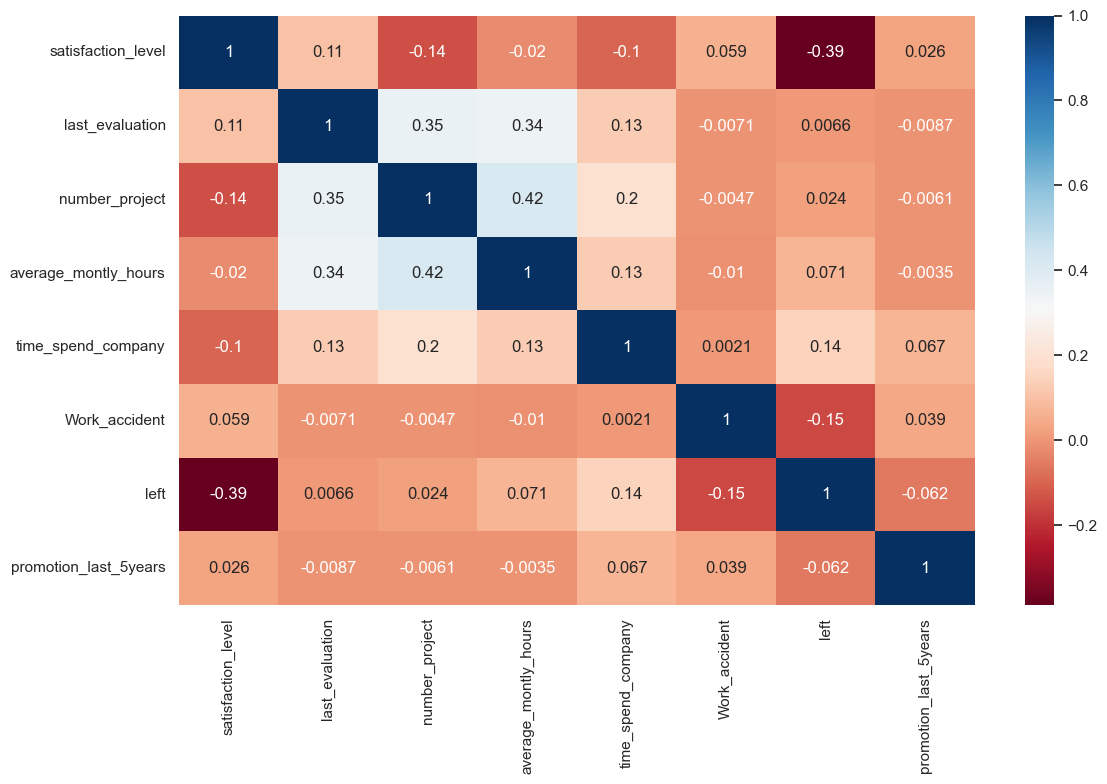

In [10]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(hr.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

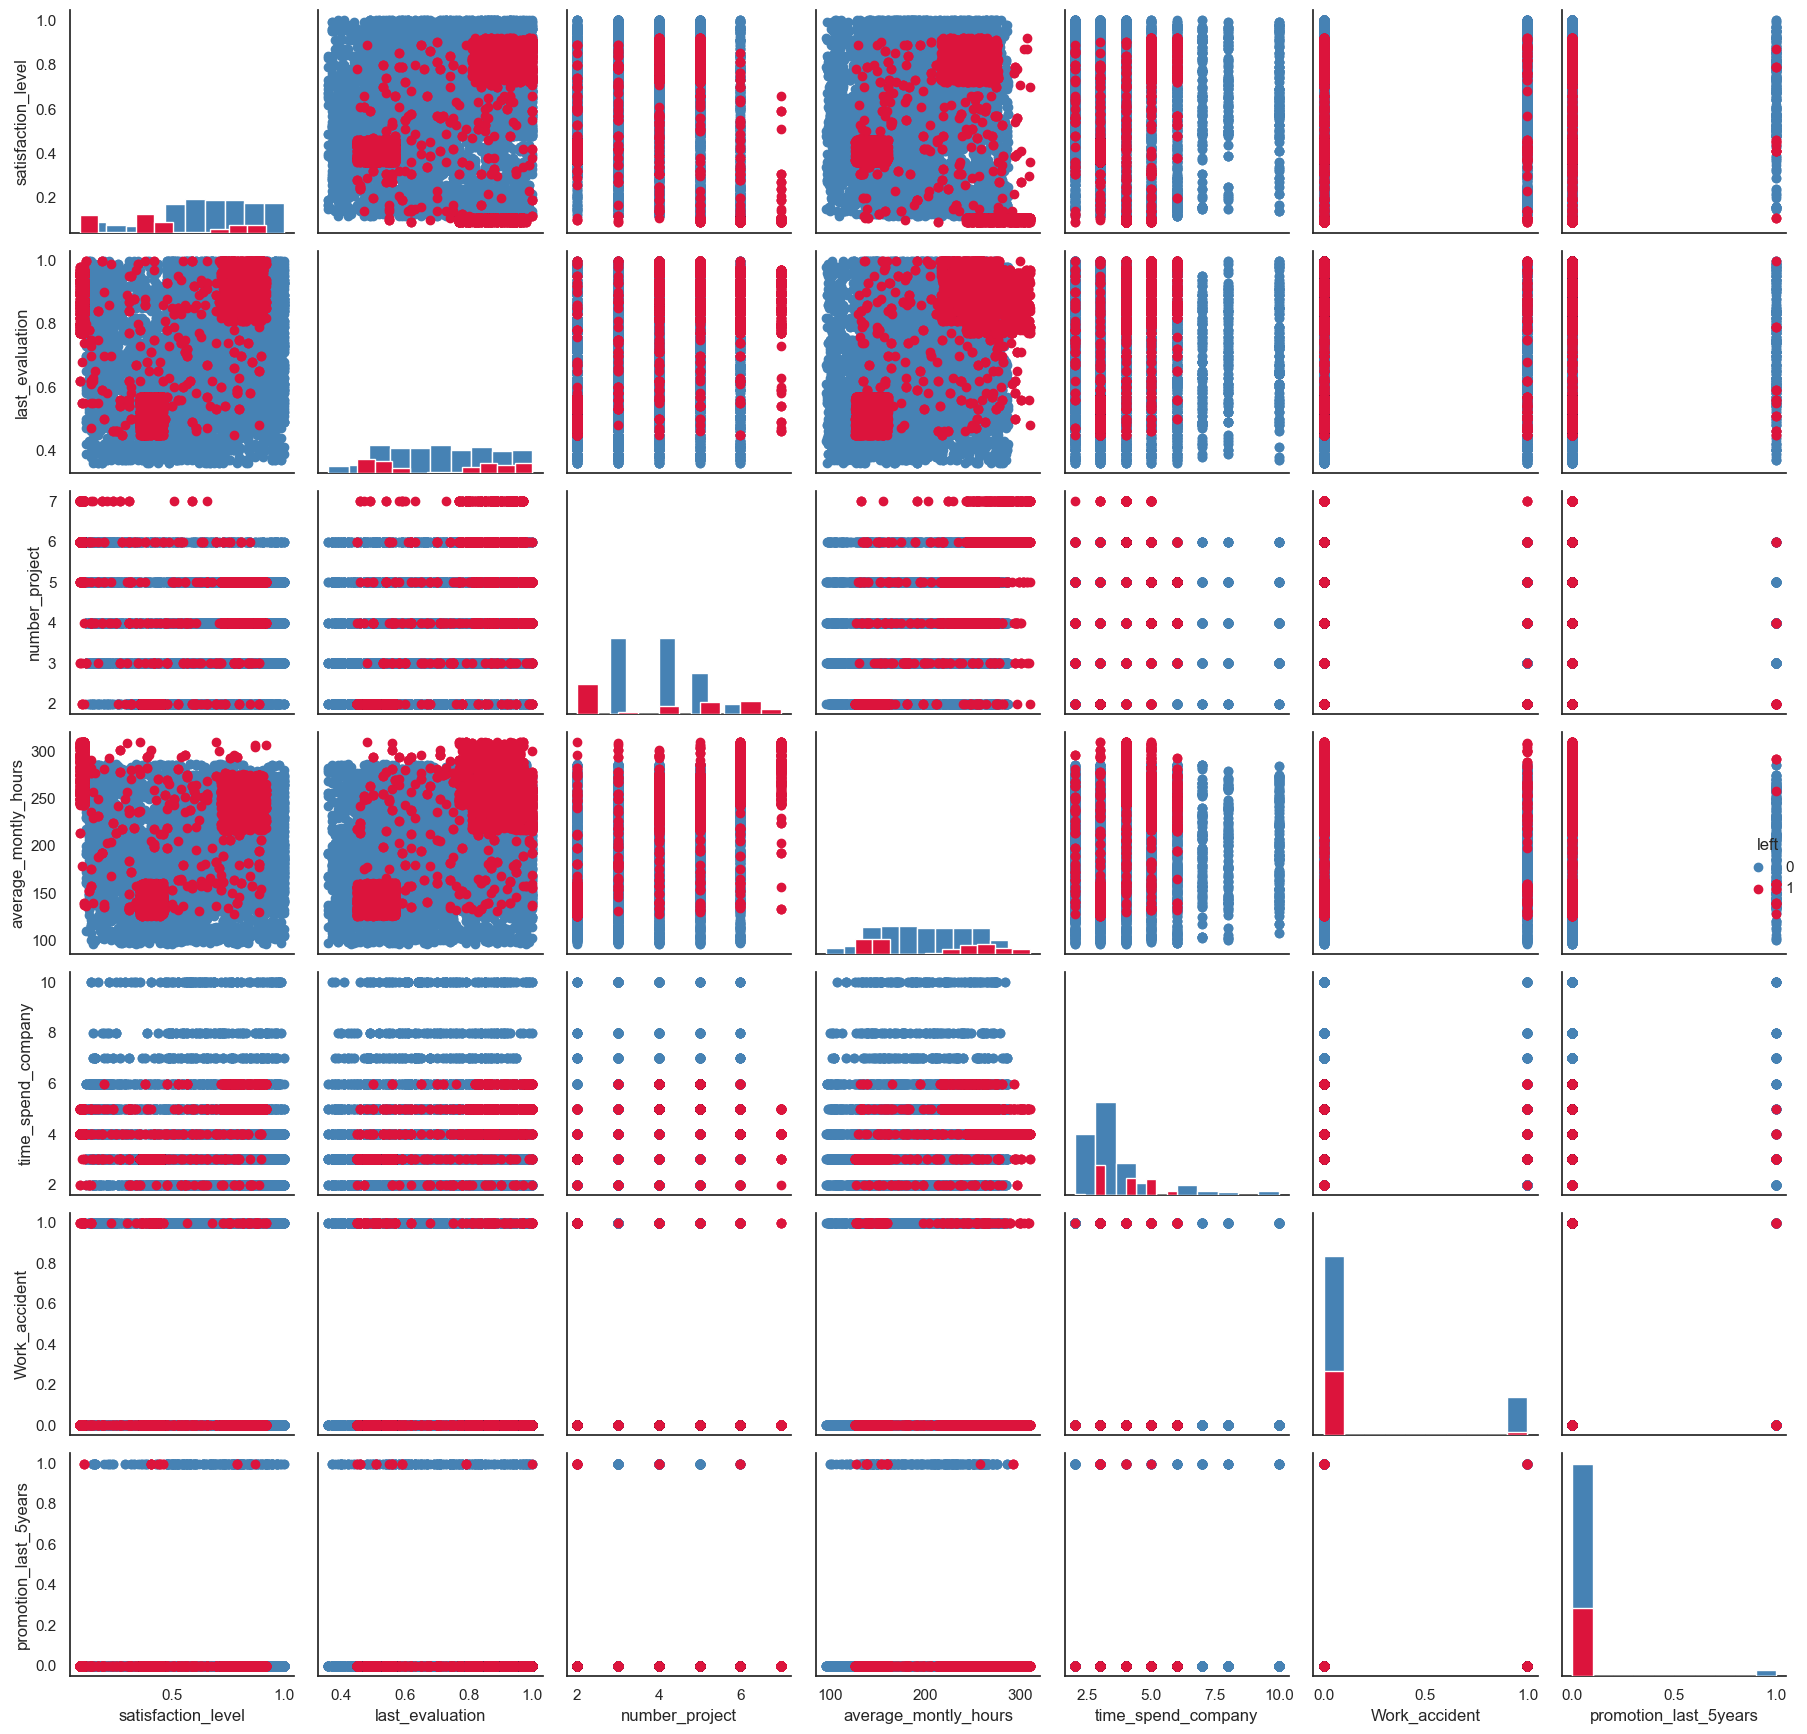

In [11]:
# Pair Plot
plot = sns.PairGrid(hr, hue='left', palette=('steelblue', 'crimson'))
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)
plot.add_legend()
plt.tight_layout()

In [12]:
# Salary Levels proportions and turnover rates
print('Salary Levels proportions')
print(hr['salary'].value_counts()/len(hr)*100)
print('\n')
print('Turnover Rate by Salary level')
print(hr.groupby('salary')['left'].mean())

Salary Levels proportions
low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64


Turnover Rate by Salary level
salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64


In [13]:
# Departments proportions
hr['department'].value_counts()/len(hr)*100

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: department, dtype: float64

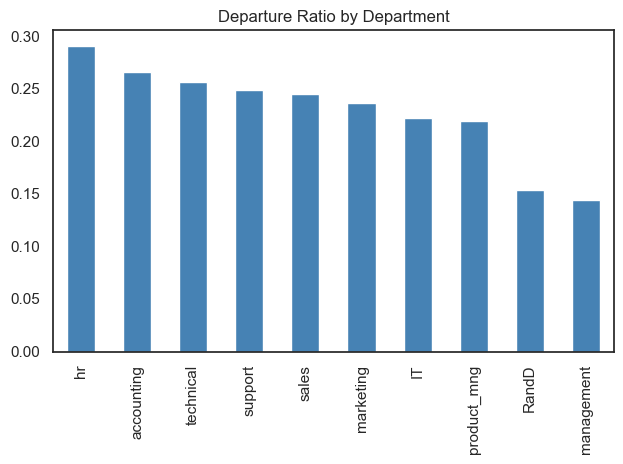

In [14]:
# Turnover Rate by Department
hr.groupby('department')['left'].mean().sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Departure Ratio by Department')
plt.xlabel('')
plt.tight_layout()

C:\Users\admin\AppData\Local\Temp\ipykernel_10508\629020807.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hr.satisfaction_level,


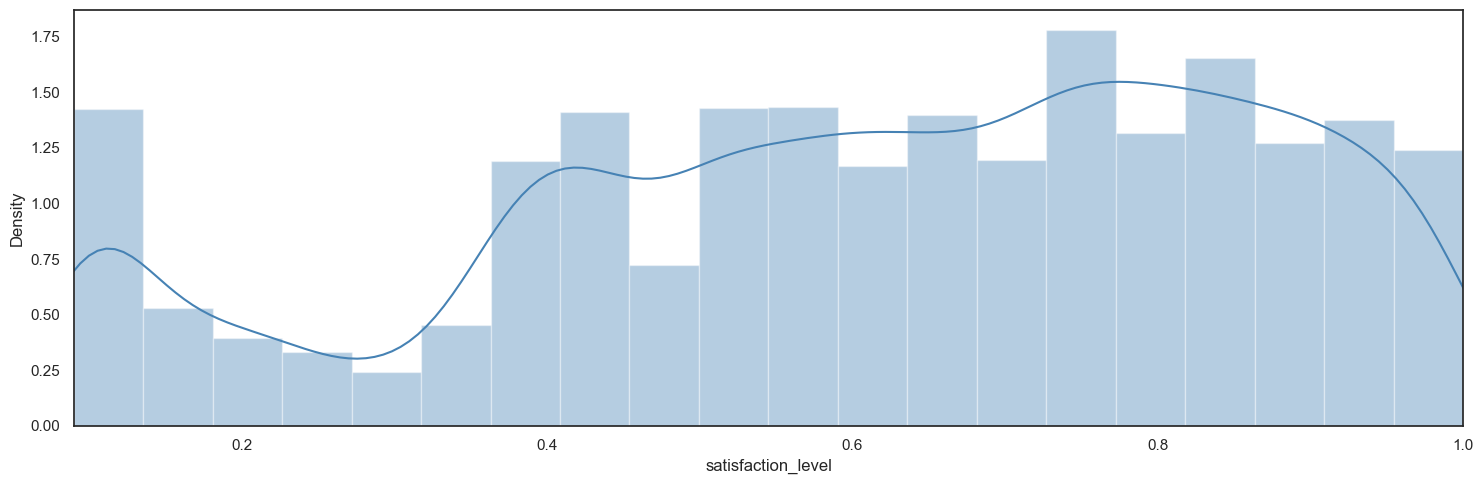

In [15]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(hr.satisfaction_level,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.satisfaction_level),max(hr.satisfaction_level))
plt.tight_layout()

C:\Users\admin\AppData\Local\Temp\ipykernel_10508\3547681885.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hr.last_evaluation,


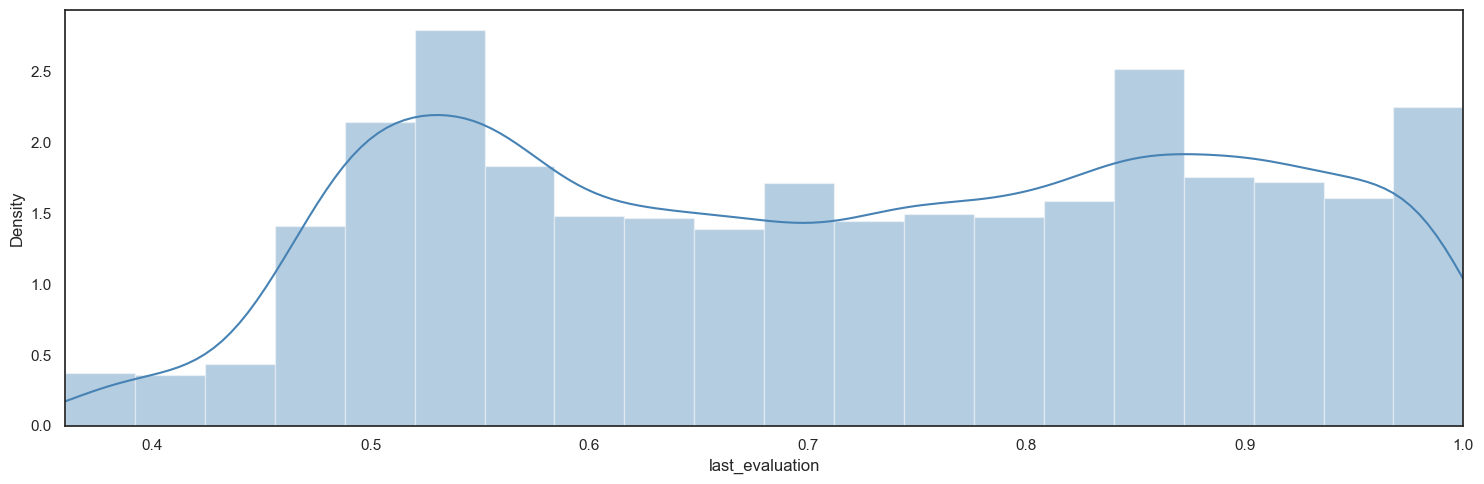

In [17]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(hr.last_evaluation,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.last_evaluation),max(hr.last_evaluation))
plt.tight_layout()

C:\Users\admin\AppData\Local\Temp\ipykernel_10508\475219217.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hr.number_project,


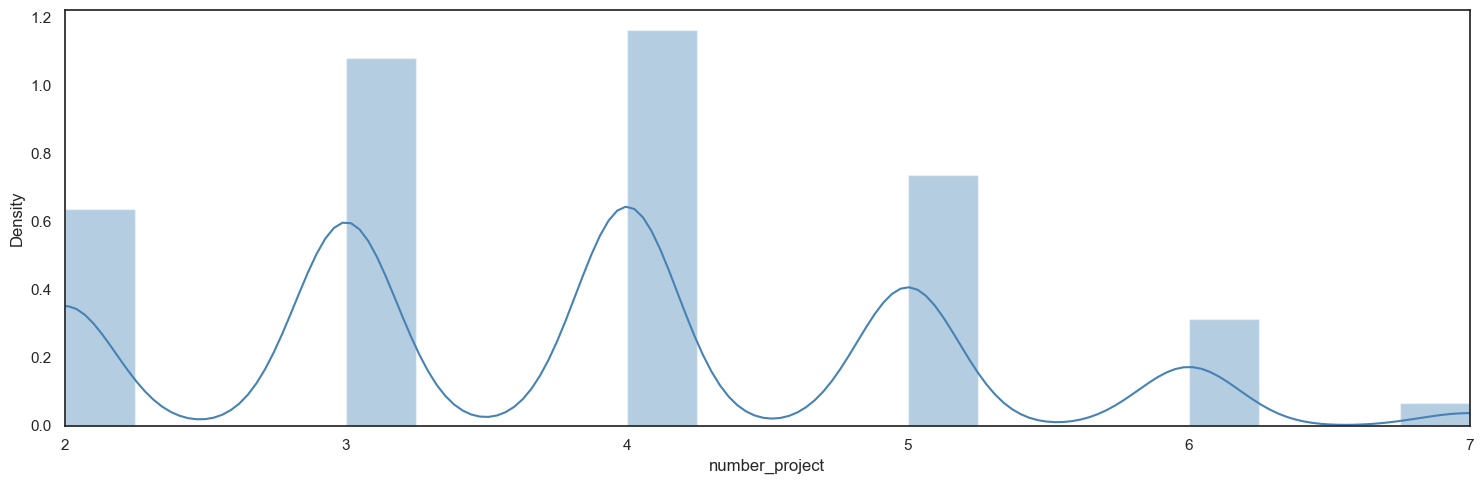

In [19]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(hr.number_project,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.number_project),max(hr.number_project))
plt.tight_layout()

C:\Users\admin\AppData\Local\Temp\ipykernel_10508\1930739992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hr.average_montly_hours,


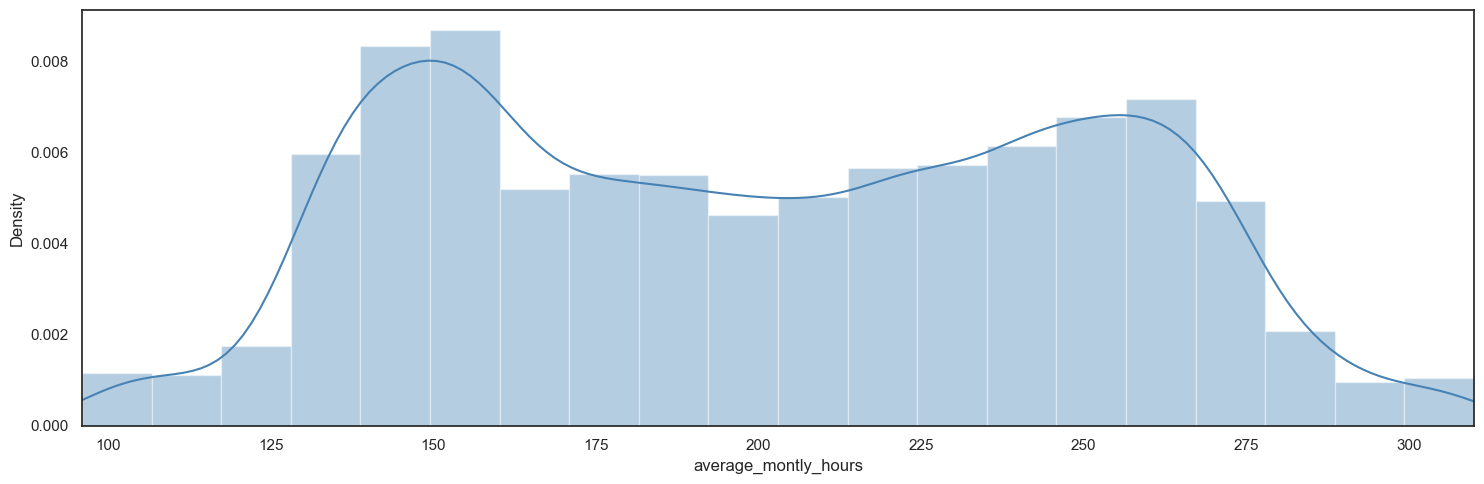

In [21]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(hr.average_montly_hours,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.average_montly_hours),max(hr.average_montly_hours))
plt.tight_layout()

In [26]:
print('Turnover Rate if Promotion:', round(len(hr[(hr['promotion_last_5years']==1)&(hr['left']==1)])/len(hr[(hr['promotion_last_5years']==1)])*100,2),'%')
print('Turnover Rate if No Promotion:', round(len(hr[(hr['promotion_last_5years']==0)&(hr['left']==1)])/len(hr[(hr['promotion_last_5years']==0)])*100,2),'%')

Turnover Rate if Promotion: 5.96 %
Turnover Rate if No Promotion: 24.2 %


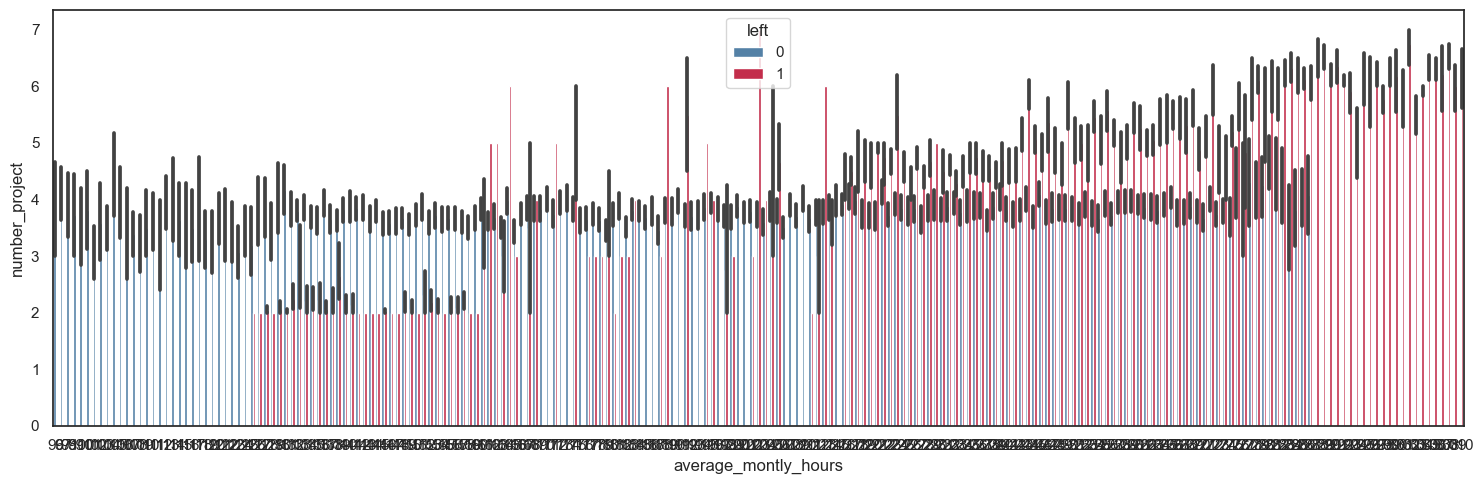

In [27]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=hr.average_montly_hours,
            y=hr.number_project,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

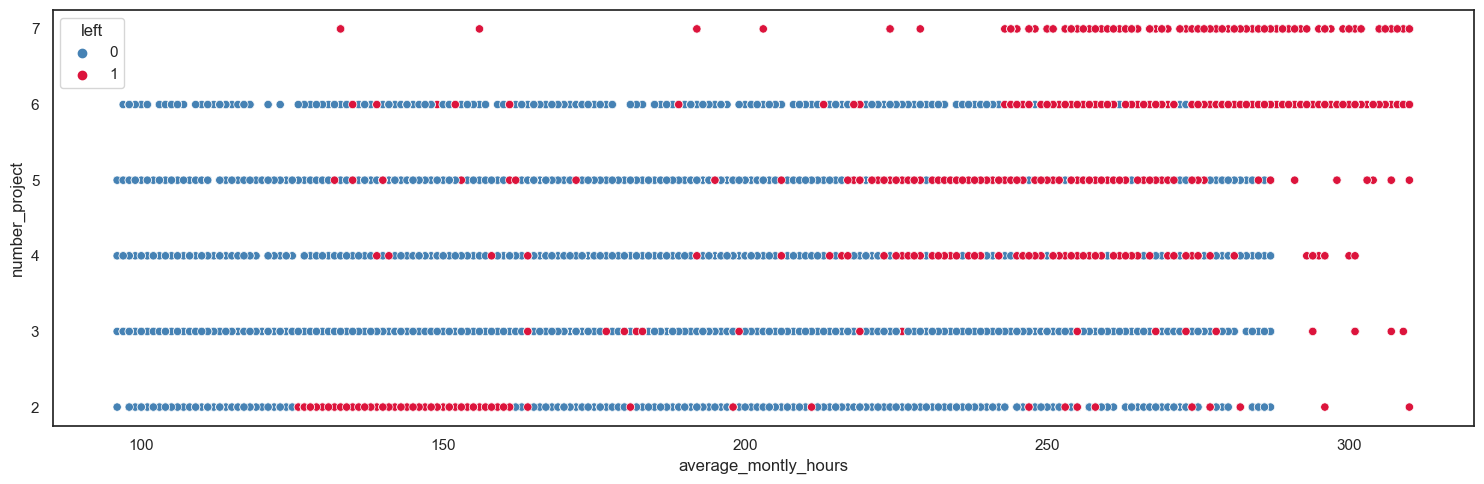

In [28]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr.average_montly_hours,
            y=hr.number_project,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

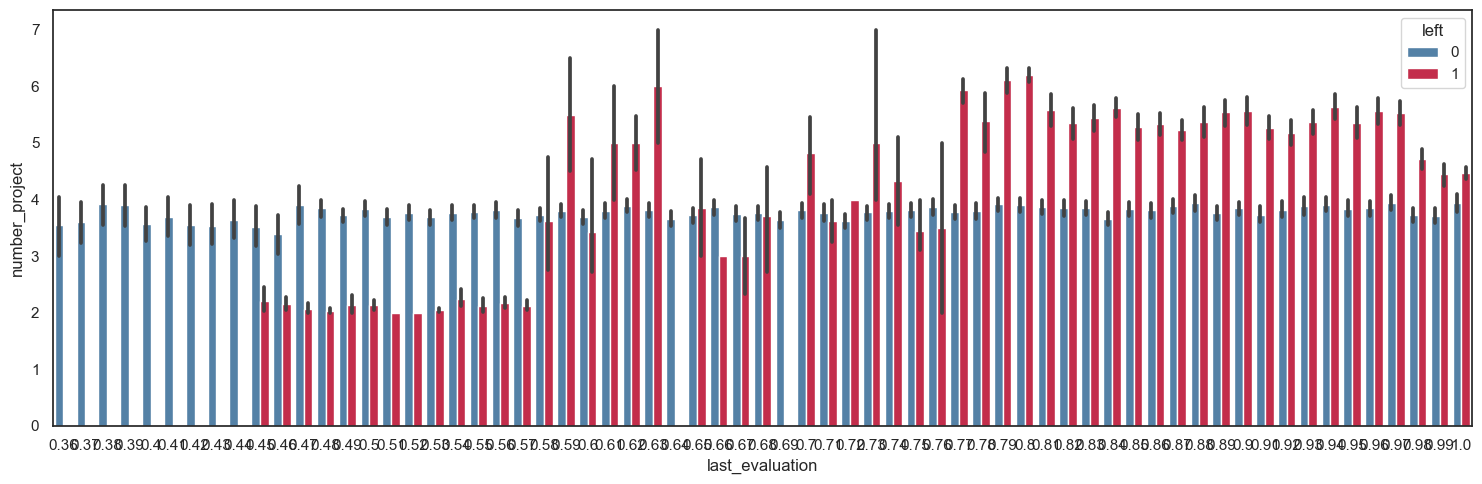

In [29]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=hr.last_evaluation,
            y=hr.number_project,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

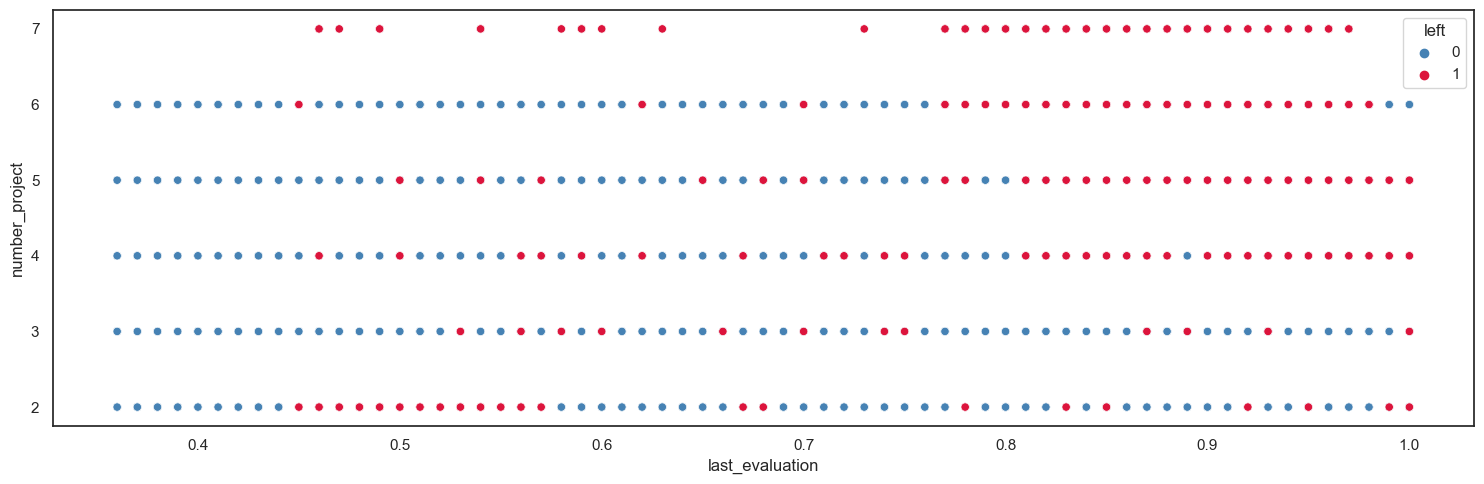

In [30]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr.last_evaluation,
            y=hr.number_project,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

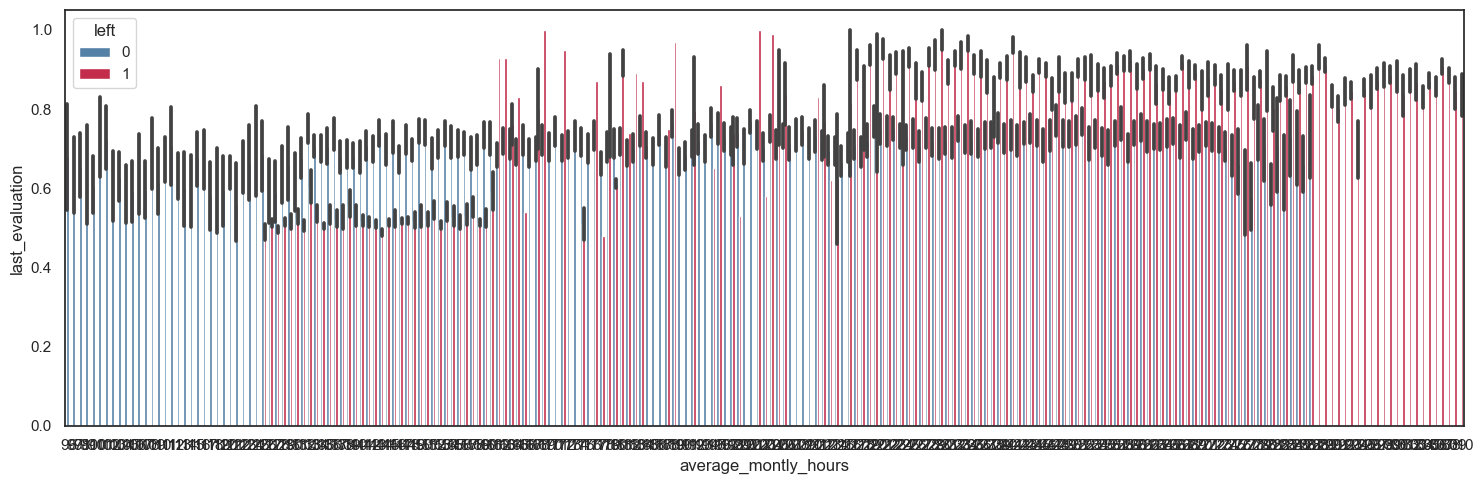

In [31]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=hr.average_montly_hours,
            y=hr.last_evaluation,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

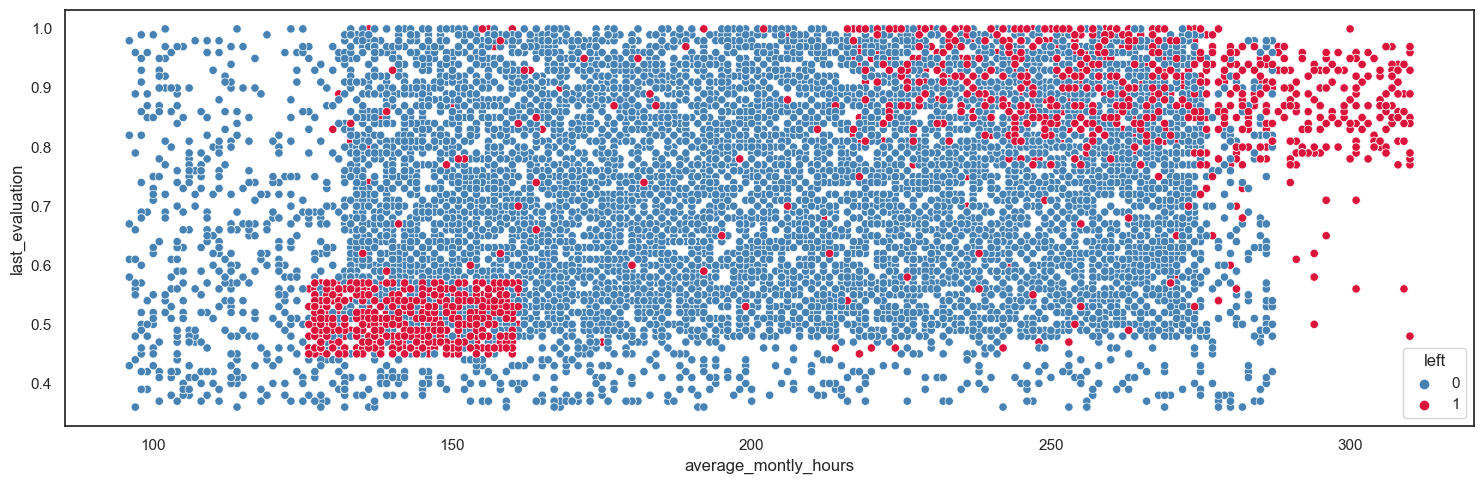

In [32]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr.average_montly_hours,
            y=hr.last_evaluation,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

# Encoding Categorical Variables

In [33]:
# Encoding the variable salary
salary_dict = {'low':0,'medium':1,'high':2}
hr['salary_num'] = hr.salary.map(salary_dict)
hr.drop('salary', inplace=True, axis=1)
hr = hr.rename(index=str, columns={'salary_num':'salary'})
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [34]:
def numerical_features(df):
    columns = df.columns
    return df._get_numeric_data().columns

def categorical_features(df):
    numerical_columns = numerical_features(df)
    return(list(set(df.columns) - set(numerical_columns)))

def onehot_encode(df):
    numericals = df.get(numerical_features(df))
    new_df = numericals.copy()
    for categorical_column in categorical_features(df):
        new_df = pd.concat([new_df, 
                            pd.get_dummies(df[categorical_column], 
                                           prefix=categorical_column)], 
                           axis=1)
    return new_df

In [35]:
hr_encoded = onehot_encode(hr)
hr_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
df_desc(hr_encoded)

,dtype,NAs,Numerical,Boolean,Categorical
satisfaction_level,float64,0,True,False,False
last_evaluation,float64,0,True,False,False
number_project,int64,0,True,False,False
average_montly_hours,int64,0,True,False,False
time_spend_company,int64,0,True,False,False
Work_accident,int64,0,False,True,False
left,int64,0,False,True,False
promotion_last_5years,int64,0,False,True,False
salary,int64,0,True,False,False
department_IT,uint8,0,False,True,False


# Scaling and Skewness

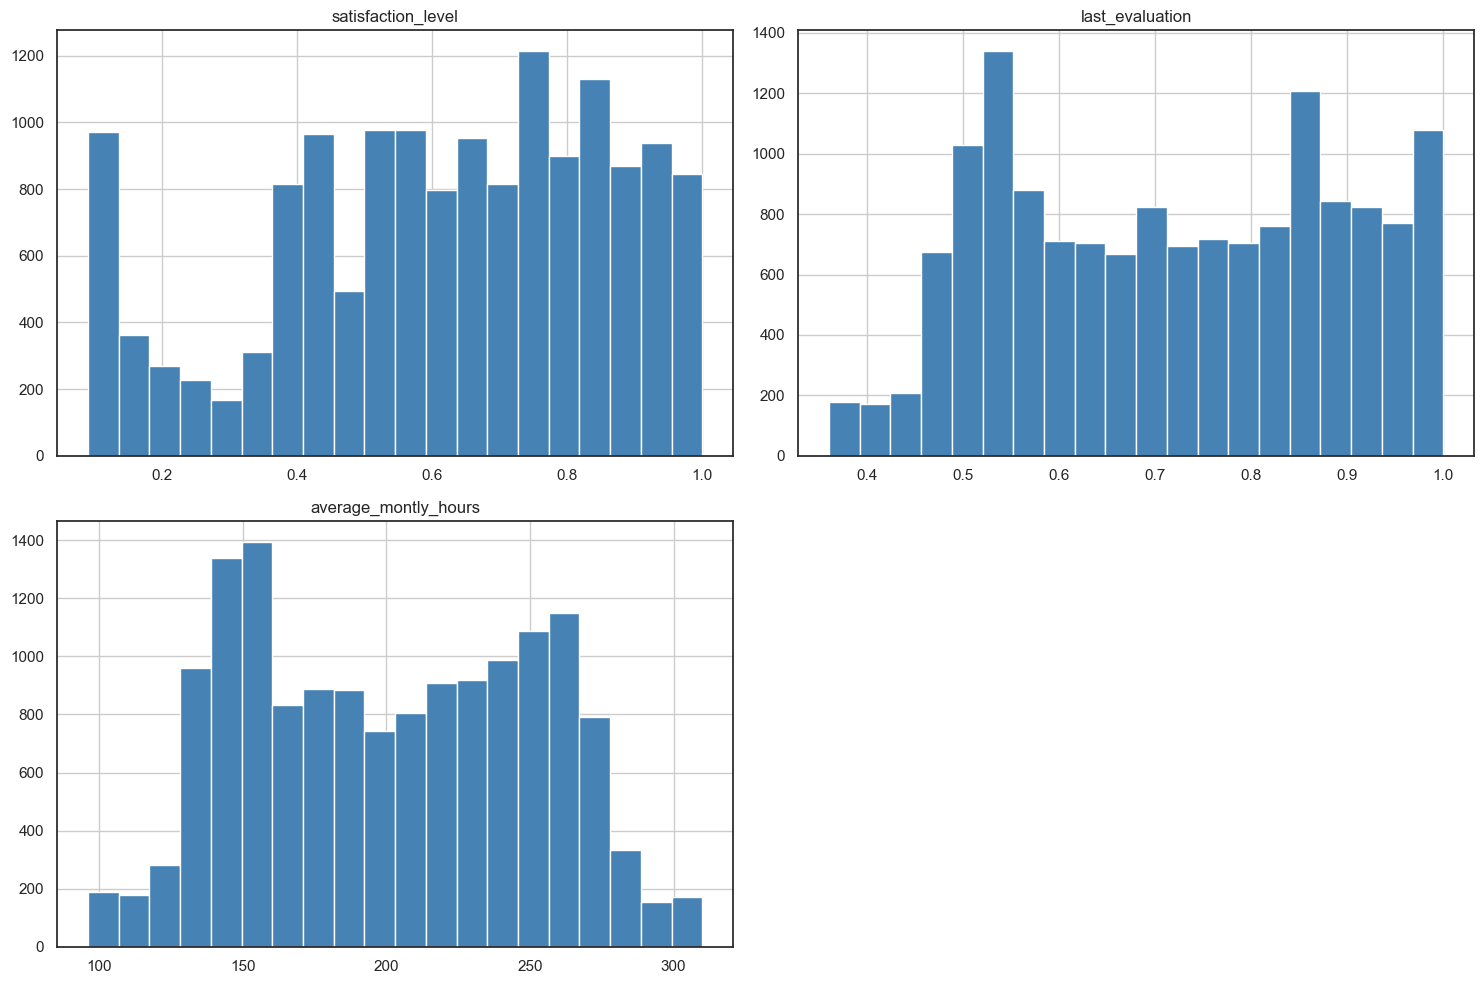

In [37]:
hr_encoded[['satisfaction_level',
           'last_evaluation',
           'average_montly_hours'
           ]].hist(bins = 20, figsize = (15,10), color = 'steelblue')
plt.tight_layout()

In [38]:
hr_encoded[['satisfaction_level',
           'last_evaluation',
           'average_montly_hours'
           ]].describe()

,satisfaction_level,last_evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,201.050337
std,0.248631,0.171169,49.943099
min,0.090000,0.360000,96.000000
25%,0.440000,0.560000,156.000000
50%,0.640000,0.720000,200.000000
75%,0.820000,0.870000,245.000000
max,1.000000,1.000000,310.000000


In [39]:
scaler = preprocessing.MinMaxScaler()
hr_scaled_part = scaler.fit_transform(hr_encoded[['satisfaction_level',
                                                  'last_evaluation',
                                                  'average_montly_hours']])
hr_scaled_part = pd.DataFrame(hr_scaled_part, columns=list(['satisfaction_level',
                                                  'last_evaluation',
                                                  'average_montly_hours']))

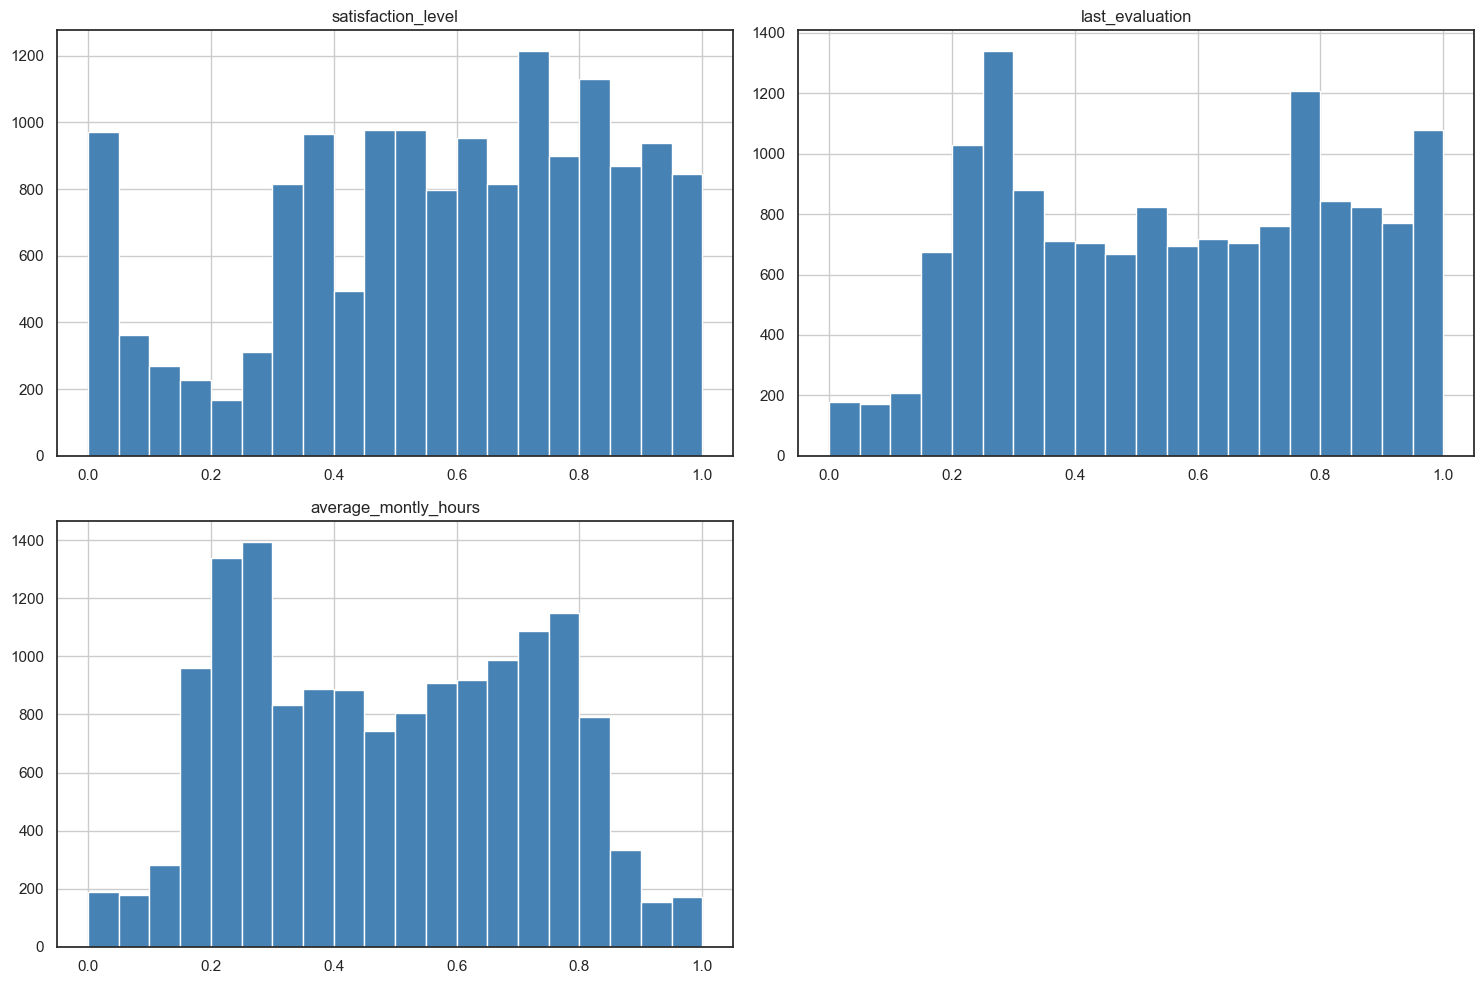

In [40]:
hr_scaled_part[['satisfaction_level',
                'last_evaluation',
                'average_montly_hours']].hist(bins = 20, figsize = (15,10), color = 'steelblue')
plt.tight_layout()

In [41]:
hr_scaled_part.describe()

,satisfaction_level,last_evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.490889
std,0.273220,0.267452,0.233379
min,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.280374
50%,0.604396,0.562500,0.485981
75%,0.802198,0.796875,0.696262
max,1.000000,1.000000,1.000000


In [42]:
def feature_skewness(df):
    numeric_dtypes = ['int16', 'int32', 'int64', 
                      'float16', 'float32', 'float64']
    numeric_features = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes: 
            numeric_features.append(i)

    feature_skew = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':feature_skew})
    return feature_skew, numeric_features

In [43]:
def fix_skewness(df):
    feature_skew, numeric_features = feature_skewness(df)
    high_skew = feature_skew[feature_skew > 0.5]
    skew_index = high_skew.index
    
    for i in skew_index:
        df[i] = boxcox1p(df[i], boxcox_normmax(df[i]+1))

    skew_features = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':skew_features})
    return df

In [44]:
hr_skewed_part = fix_skewness(hr_scaled_part)

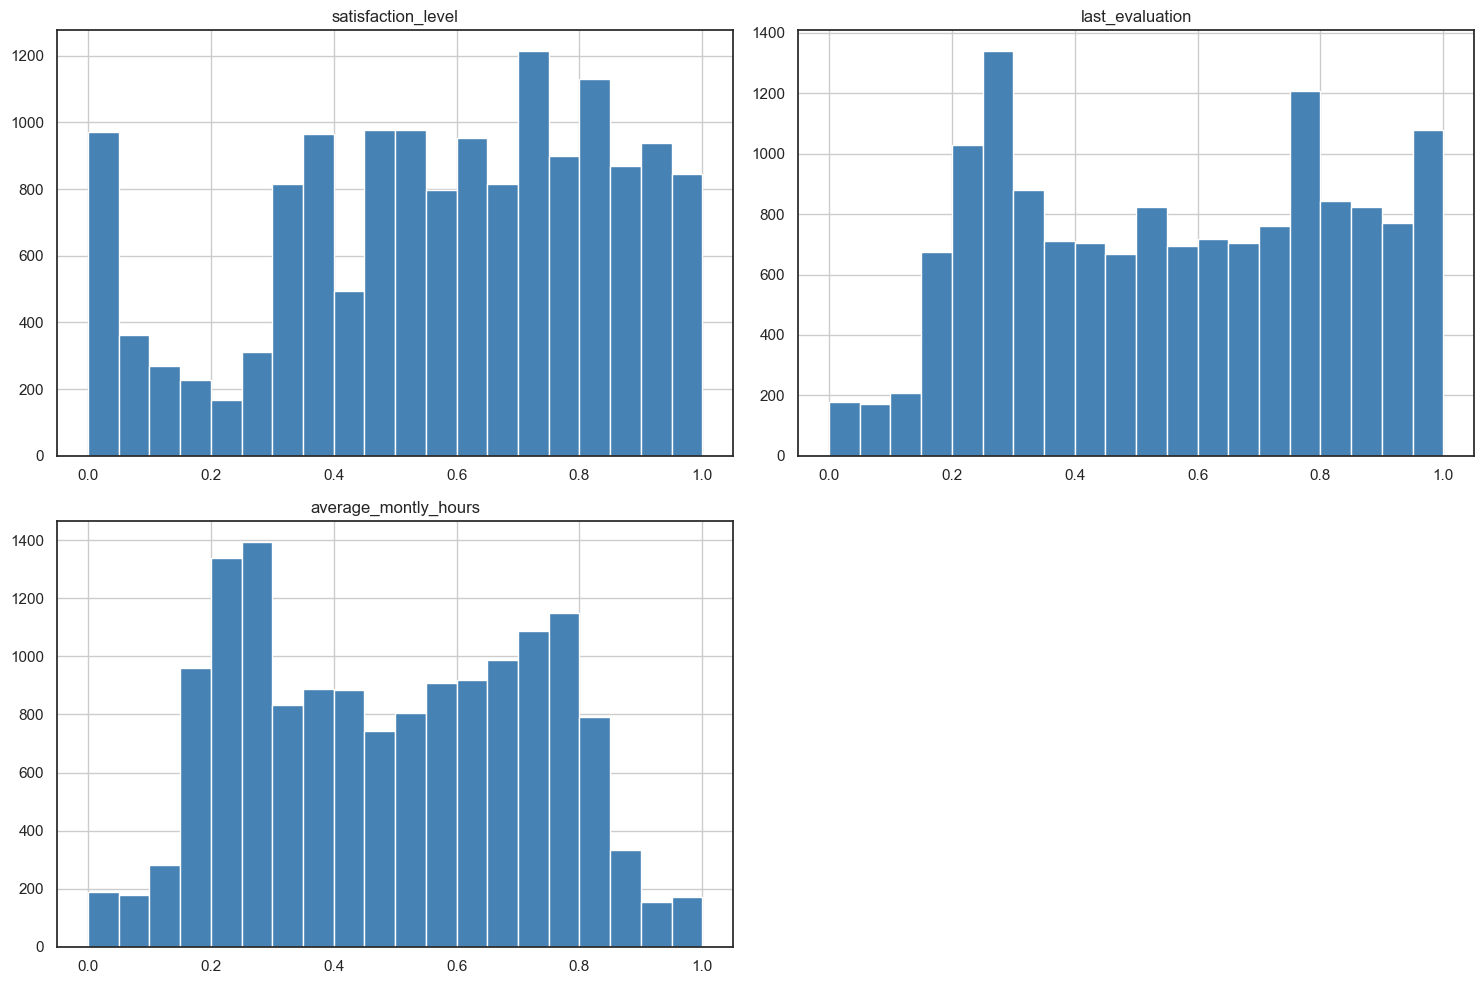

In [45]:
hr_skewed_part.hist(bins = 20, figsize = (15,10), color = 'steelblue')
plt.tight_layout()

In [46]:
hr_skewed_part.describe()

,satisfaction_level,last_evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.490889
std,0.273220,0.267452,0.233379
min,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.280374
50%,0.604396,0.562500,0.485981
75%,0.802198,0.796875,0.696262
max,1.000000,1.000000,1.000000


In [47]:
hr_simple = hr_encoded.copy()
hr_simple.drop(['satisfaction_level',
                'last_evaluation',
                'average_montly_hours'], inplace=True, axis=1)

hr_ready = pd.DataFrame()
hr_simple.reset_index(drop=True, inplace=True)
hr_skewed_part.reset_index(drop=True, inplace=True)

hr_ready = pd.concat([hr_skewed_part,hr_simple], axis=1, sort=False, ignore_index=False)

# hr_ready['number_project'] = hr_ready['number_project'].astype('category').cat.codes
# hr_ready['time_spend_company'] = hr_ready['time_spend_company'].astype('category').cat.codes

hr_ready.head()

,satisfaction_level,last_evaluation,average_montly_hours,number_project,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.318681,0.265625,0.285047,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.780220,0.781250,0.775701,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.021978,0.812500,0.822430,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.692308,0.796875,0.593458,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.307692,0.250000,0.294393,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
df_desc(hr_ready)

,dtype,NAs,Numerical,Boolean,Categorical
satisfaction_level,float64,0,True,False,False
last_evaluation,float64,0,True,False,False
average_montly_hours,float64,0,True,False,False
number_project,int64,0,True,False,False
time_spend_company,int64,0,True,False,False
Work_accident,int64,0,False,True,False
left,int64,0,False,True,False
promotion_last_5years,int64,0,False,True,False
salary,int64,0,True,False,False
department_IT,uint8,0,False,True,False


In [49]:
hr_ready.describe()

,satisfaction_level,last_evaluation,average_montly_hours,number_project,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.490889,3.803054,3.498233,0.144610,0.238083,0.021268,0.594706,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.273220,0.267452,0.233379,1.232592,1.460136,0.351719,0.425924,0.144281,0.637183,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.280374,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604396,0.562500,0.485981,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.802198,0.796875,0.696262,5.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


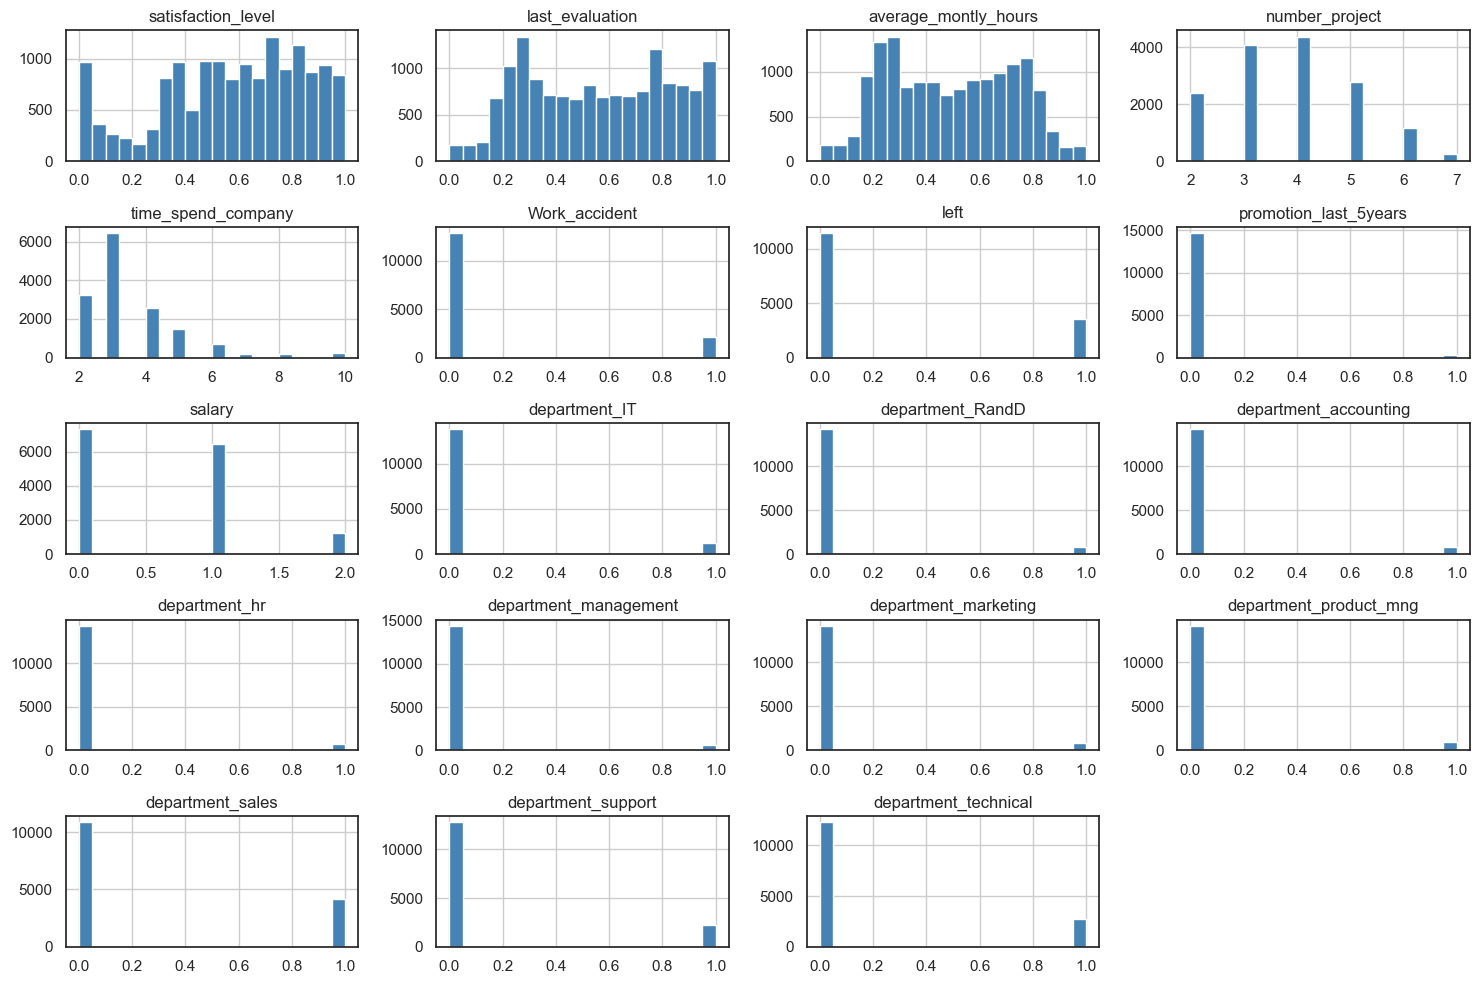

In [50]:
hr_ready.hist(bins = 20, figsize = (15,10), color = 'steelblue')
plt.tight_layout()

In [51]:
target = 'left'

split_ratio = 0.3
seed = 806

def split_dataset(df, target, split_ratio=0.3, seed=806):
    features = list(df)
    features.remove(target)

    X = df[features]
    y = df[[target]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=seed)

    return X, y, X_train, X_test, y_train, y_test

X, y, X_train, X_test, y_train, y_test = split_dataset(hr_ready, target, split_ratio, seed)

print('Features:',X.shape[0], 'items | ', X.shape[1],'columns')
print('Target:',y.shape[0], 'items | ', y.shape[1],'columns')
print('Features Train:',X_train.shape[0], 'items | ', X_train.shape[1],'columns')
print('Features Test:',X_test.shape[0], 'items | ', X_test.shape[1],'columns')
print('Target Train:',y_train.shape[0], 'items | ', y_train.shape[1],'columns')
print('Target Test:',y_test.shape[0], 'items | ', y_test.shape[1],'columns')

Features: 14999 items |  18 columns
Target: 14999 items |  1 columns
Features Train: 10499 items |  18 columns
Features Test: 4500 items |  18 columns
Target Train: 10499 items |  1 columns
Target Test: 4500 items |  1 columns


In [52]:
lr = LogisticRegression(solver='lbfgs', max_iter = 300)

In [53]:
def lr_run(model, X_train, y_train, X_test, y_test):
    result = model.fit(X_train, y_train.values.ravel())

    y_pred = model.predict(X_test)
    acc_test = model.score(X_test, y_test)
    coefficients = pd.concat([pd.DataFrame(X_train.columns, columns=['Feature']), pd.DataFrame(np.transpose(model.coef_), columns=['Coef.'])], axis = 1)
    coefficients.loc[-1] = ['intercept.', model.intercept_[0]]
    coefficients.index = coefficients.index + 1
    coefficients = coefficients.sort_index()
    
    print('Accuracy on test: {:.3f}'.format(acc_test))
    print()
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()
    print(coefficients)

In [54]:
lr_run(lr, X_train, y_train, X_test, y_test)

Accuracy on test: 0.797

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3435
           1       0.63      0.34      0.44      1065

    accuracy                           0.80      4500
   macro avg       0.73      0.64      0.66      4500
weighted avg       0.78      0.80      0.77      4500

Confusion Matrix:
[[3220  215]
 [ 700  365]]

                   Feature     Coef.
0               intercept.  0.655604
1       satisfaction_level -3.617316
2          last_evaluation  0.439285
3     average_montly_hours  0.910832
4           number_project -0.285470
5       time_spend_company  0.245425
6            Work_accident -1.395101
7    promotion_last_5years -1.192303
8                   salary -0.695773
9            department_IT -0.068379
10        department_RandD -0.475997
11   department_accounting  0.067517
12           department_hr  0.333686
13   department_management -0.353435
14    department_marketing  0.060231
15  depart

In [55]:
def plot_roc(model, X_test, y_test):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show();

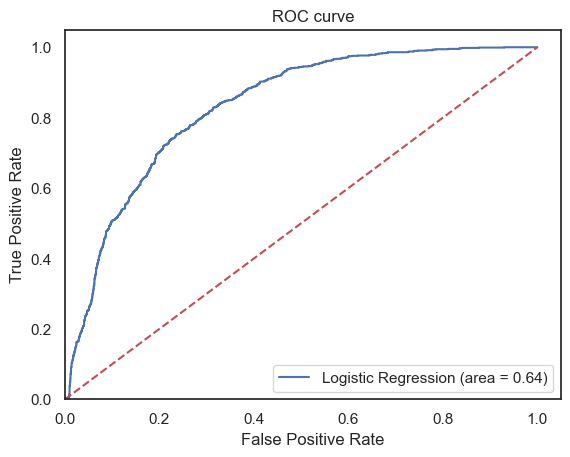

In [56]:
plot_roc(lr, X_test, y_test)

In [57]:
def cv_acc (model, X_train, y_train, n_splits, seed):
    kfold = model_selection.KFold(n_splits=n_splits, random_state=seed)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
    print()
    for i in range(len(results)):
        print('Iteration', '{:>2}'.format(i+1), '| Accuracy: {:.2f}'.format(results[i]))

In [59]:
hr_fe = hr_ready.copy()

In [60]:
bins = [-1, 0.03, 0.29, 0.41, 0.69, 0.92, 1]
labels=['(0.00, 0.11]','(0.11, 0.35]','(0.35, 0.46]','(0.46, 0.71]','(0.71, 0.92]','(0.92, 1.00]']
hr_fe['satisfaction_level_bin'] = pd.cut(hr_fe.satisfaction_level, bins, labels=labels)
hr_fe.satisfaction_level_bin.value_counts()

(0.71, 0.92]    4765
(0.46, 0.71]    4689
(0.35, 0.46]    2012
(0.92, 1.00]    1362
(0.11, 0.35]    1283
(0.00, 0.11]     888
Name: satisfaction_level_bin, dtype: int64

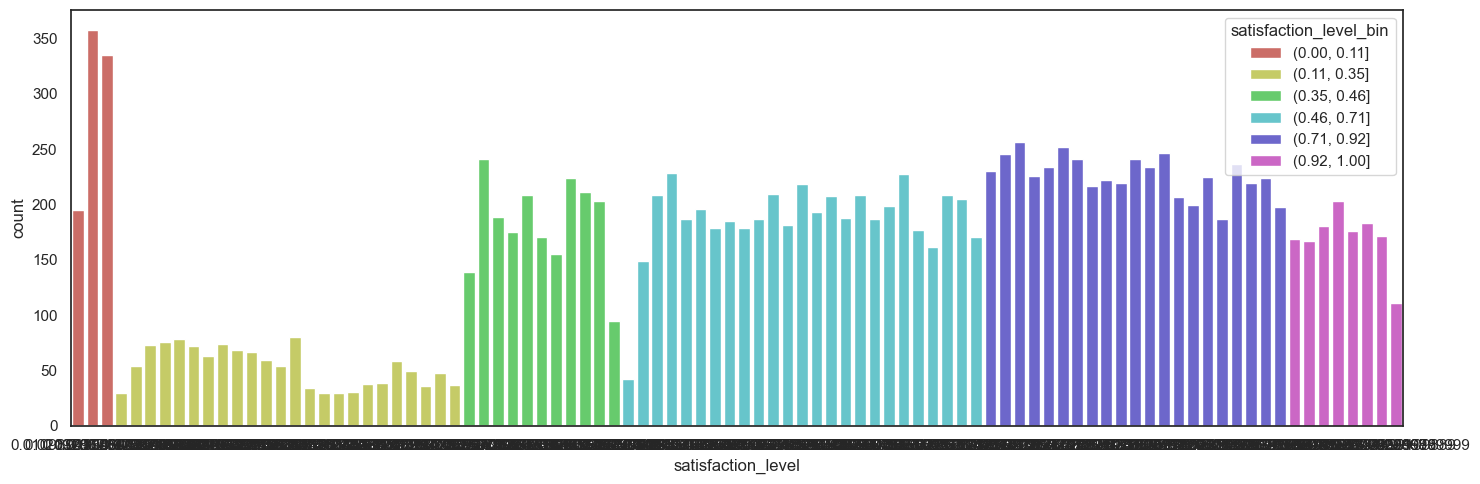

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x=hr_fe.satisfaction_level,
              hue=hr_fe.satisfaction_level_bin,
              palette = sns.color_palette("hls", 6),
              dodge = False)
plt.tight_layout()

In [62]:
hr_fe_1 = hr_fe.copy()
hr_fe_1 = onehot_encode(hr_fe_1)
hr_fe_1.drop('satisfaction_level', inplace=True, axis=1)

In [64]:
bins = [-1, 0.14, 0.34, 0.64, 1]
labels=['(0.00, 0.44]','(0.44, 0.57]','(0.57, 0.76]','(0.76, 1.00]']
hr_fe['last_evaluation_bin'] = pd.cut(hr_fe.last_evaluation, bins, labels=labels)
hr_fe_1['last_evaluation_bin'] = pd.cut(hr_fe_1.last_evaluation, bins, labels=labels)
hr_fe_1.last_evaluation_bin.value_counts()

(0.76, 1.00]    6458
(0.57, 0.76]    4279
(0.44, 0.57]    3817
(0.00, 0.44]     445
Name: last_evaluation_bin, dtype: int64

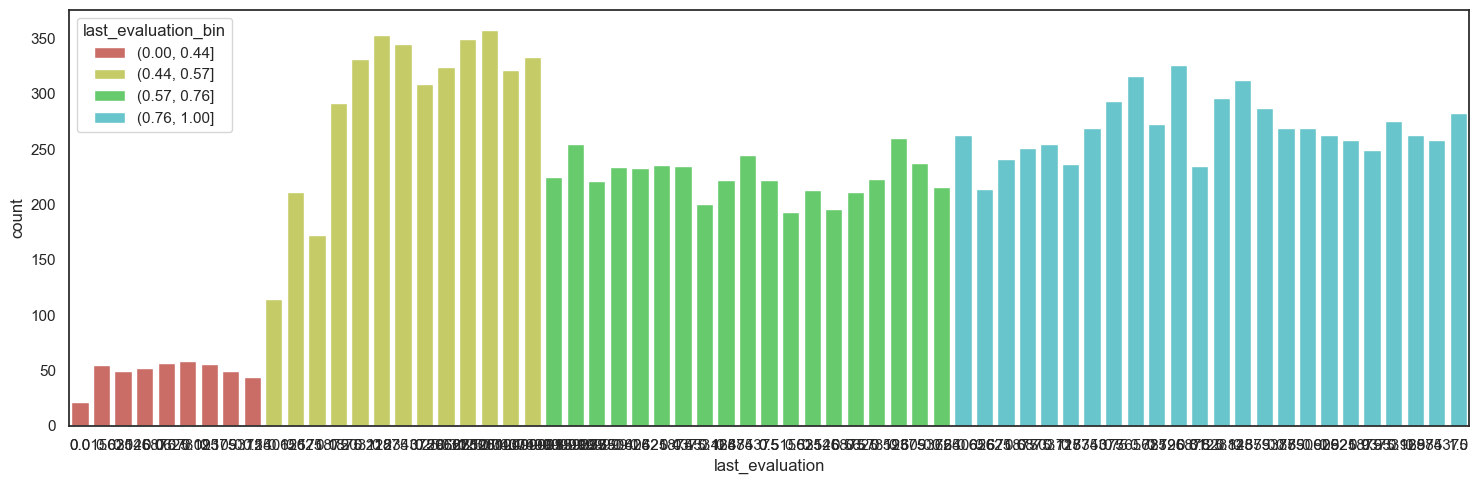

In [65]:
plt.figure(figsize=(15,5))
sns.countplot(x=hr_fe_1.last_evaluation,
              hue=hr_fe_1.last_evaluation_bin,
              palette = sns.color_palette("hls", 6),
              dodge = False)
plt.tight_layout()

In [66]:
hr_fe_2 = hr_fe_1.copy()
hr_fe_2 = onehot_encode(hr_fe_2)
hr_fe_2.drop('last_evaluation', inplace=True, axis=1)

In [68]:
bins = [-1, 0.14, 0.165, 0.304, 0.565, 0.840, 0.897, 1]
labels=['(0, 125]','(125, 131]','(131, 161]','(161, 216]','(216, 274]','(274, 287]','(287, 310]']
hr_fe['average_montly_hours_bin'] = pd.cut(hr_fe.average_montly_hours, bins, labels=labels)
hr_fe_2['average_montly_hours_bin'] = pd.cut(hr_fe_2.average_montly_hours, bins, labels=labels)
hr_fe_2.average_montly_hours_bin.value_counts()

(216, 274]    5573
(161, 216]    4290
(131, 161]    3588
(0, 125]       486
(274, 287]     379
(125, 131]     353
(287, 310]     330
Name: average_montly_hours_bin, dtype: int64

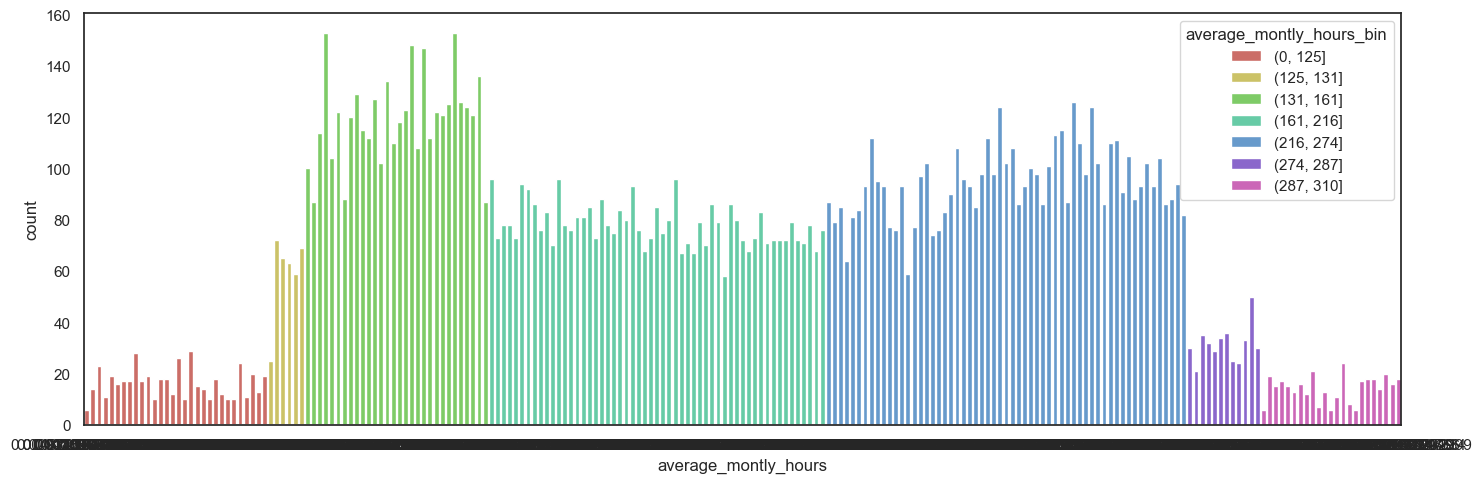

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(x=hr_fe_2.average_montly_hours,
              hue=hr_fe_2.average_montly_hours_bin,
              palette = sns.color_palette("hls", 7),
              dodge = False)
plt.tight_layout()

In [70]:
hr_fe_3 = hr_fe_2.copy()
hr_fe_3 = onehot_encode(hr_fe_3)
hr_fe_3.drop('average_montly_hours', inplace=True, axis=1)

In [72]:
categ = {2:'too low', 3:'normal', 4:'normal', 5:'normal', 6:'too high', 7:'extreme'}
hr_fe['number_project_cat'] = hr_fe.number_project.map(categ)
hr_fe_3['number_project_cat'] = hr_fe_3.number_project.map(categ)
hr_fe_3.number_project_cat.value_counts()

normal      11181
too low      2388
too high     1174
extreme       256
Name: number_project_cat, dtype: int64

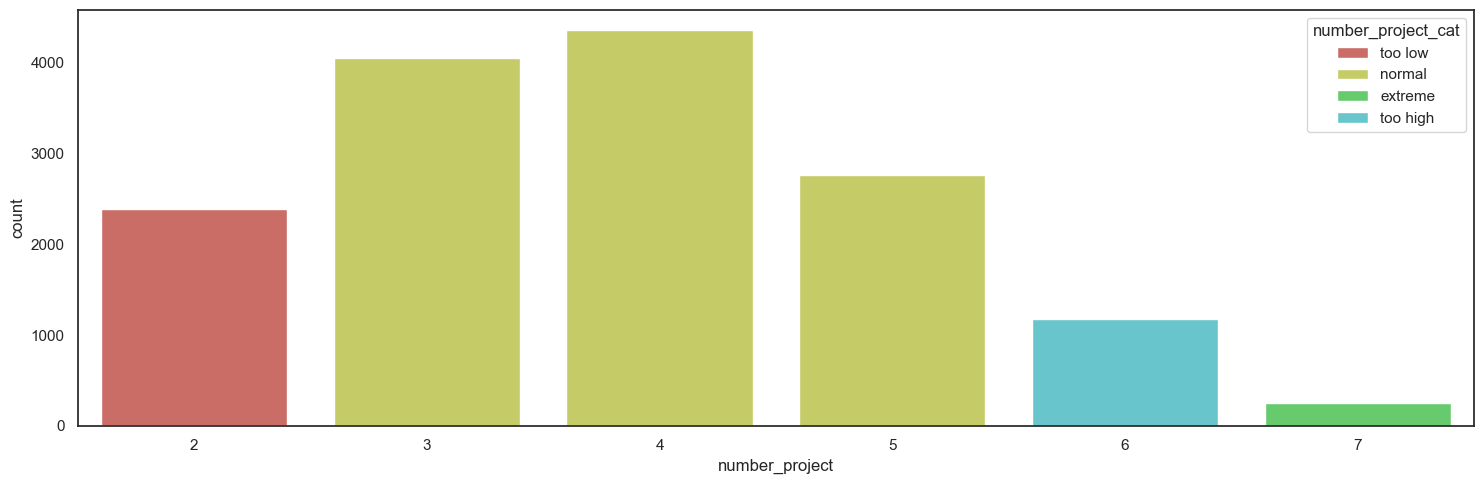

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(x=hr_fe_3.number_project,
              hue=hr_fe_3.number_project_cat,
              palette = sns.color_palette("hls", 6),
              dodge = False)
plt.tight_layout()

In [74]:
hr_fe_4 = hr_fe_3.copy()
hr_fe_4 = onehot_encode(hr_fe_4)
hr_fe_4.drop('number_project', inplace=True, axis=1)

In [76]:
categ = {2:'low departure', 3:'high departure', 4:'high departure', 5:'very high departure', 6:'high departure', 7:'no departure', 8:'no departure', 10:'no departure'}
hr_fe['time_spend_company_cat'] = hr_fe.time_spend_company.map(categ)
hr_fe_4['time_spend_company_cat'] = hr_fe_4.time_spend_company.map(categ)
hr_fe_4.time_spend_company_cat.value_counts()

high departure         9718
low departure          3244
very high departure    1473
no departure            564
Name: time_spend_company_cat, dtype: int64

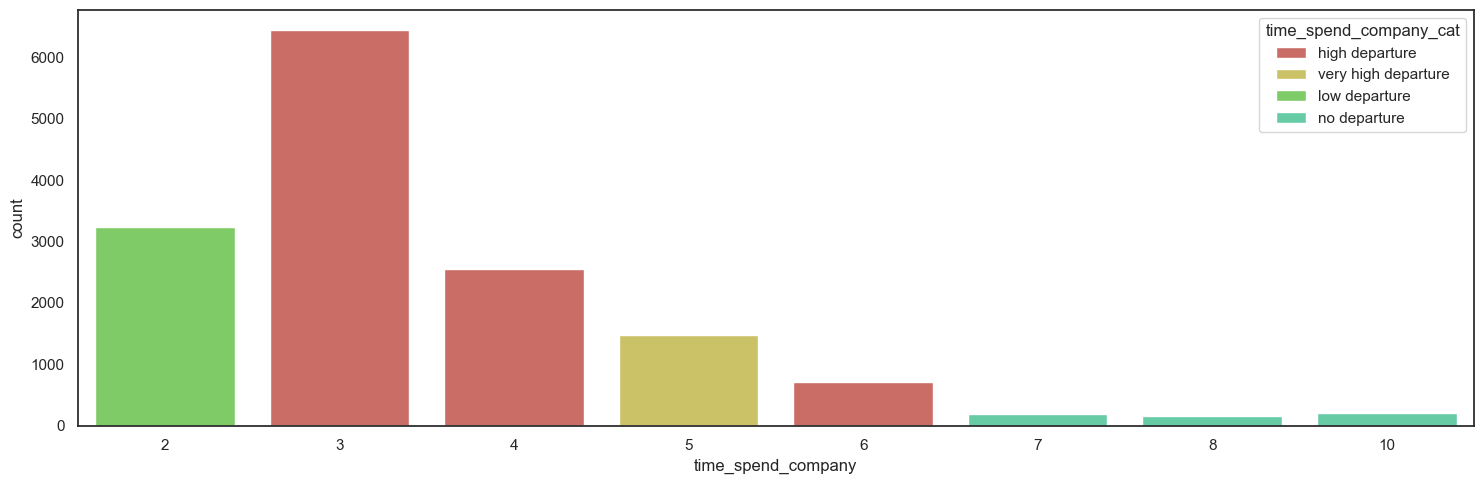

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x=hr_fe_4.time_spend_company,
              hue=hr_fe_4.time_spend_company_cat,
              palette = sns.color_palette("hls", 7),
              dodge = False)
plt.tight_layout()

In [78]:
hr_fe_5 = hr_fe_4.copy()
hr_fe_5 = onehot_encode(hr_fe_5)
hr_fe_5.drop('time_spend_company', inplace=True, axis=1)

In [80]:
def workload_cluster(row):
    if (row['average_montly_hours_bin'] == '(0, 125]'):
        return 'very low'
    if (row['number_project'] <= 2) and (row['average_montly_hours_bin'] in ['(125, 131]','(131, 161]']):
        return 'low'
    if (row['number_project'] >= 4) and (row['average_montly_hours_bin'] in ['(216, 274]','(274, 287]']):
        return 'high'
    if (row['average_montly_hours_bin'] in ['(287, 310]']):
        return 'extreme'
    return 'normal'

hr_fe['workload'] = hr_fe.apply(lambda row: workload_cluster(row), axis=1)
hr_fe.workload.value_counts()

normal      8265
high        4209
low         1709
very low     486
extreme      330
Name: workload, dtype: int64

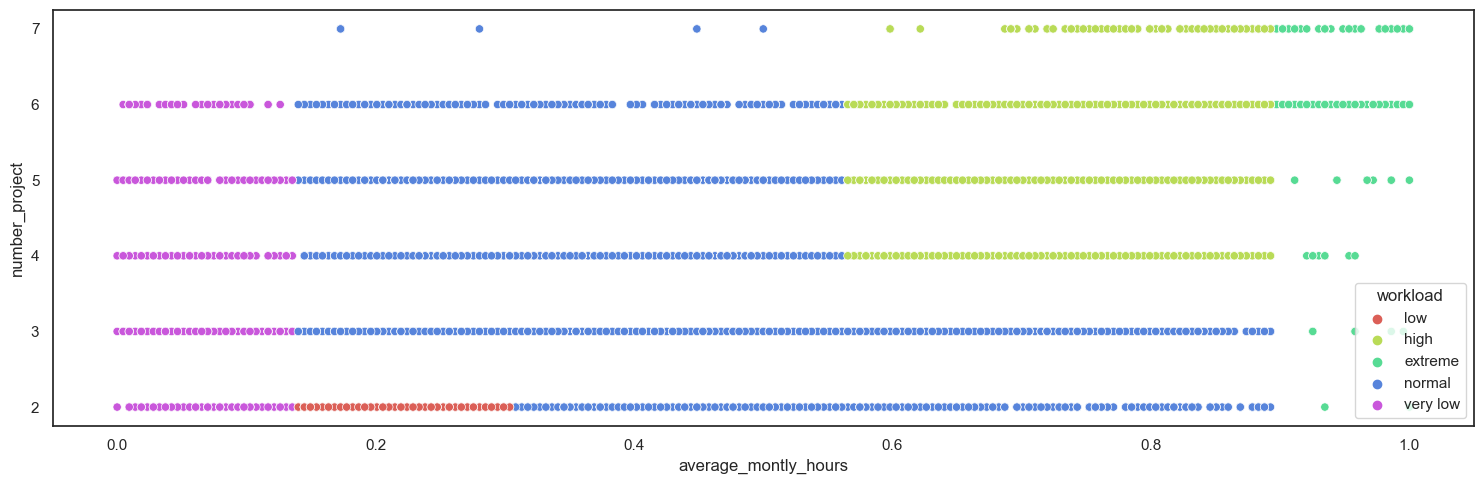

In [81]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr_fe.average_montly_hours,
                y=hr_fe.number_project,
                hue=hr_fe.workload,
                palette = sns.color_palette("hls", 5))
plt.tight_layout()

In [82]:
hr_fe_6 = hr_fe.copy()
hr_fe_6 = onehot_encode(hr_fe_6)
hr_fe_6.drop('satisfaction_level', inplace=True, axis=1)
hr_fe_6.drop('last_evaluation', inplace=True, axis=1)
hr_fe_6.drop('average_montly_hours', inplace=True, axis=1)
hr_fe_6.drop('number_project', inplace=True, axis=1)
hr_fe_6.drop('time_spend_company', inplace=True, axis=1)

In [84]:
def project_performance_cluster(row):
    if (row['last_evaluation_bin'] == '(0.00, 0.44]'):
        return 'very low'
    if (row['number_project'] <= 2) and (row['last_evaluation_bin'] in ['(0.44, 0.57]']):
        return 'low'
    if (row['number_project'] >= 4) and (row['last_evaluation_bin'] in ['(0.76, 1.00]']):
        return 'high'
    return 'normal'

hr_fe['project_performance'] = hr_fe.apply(lambda row: project_performance_cluster(row), axis=1)
hr_fe.project_performance.value_counts()

normal      8245
high        4589
low         1720
very low     445
Name: project_performance, dtype: int64

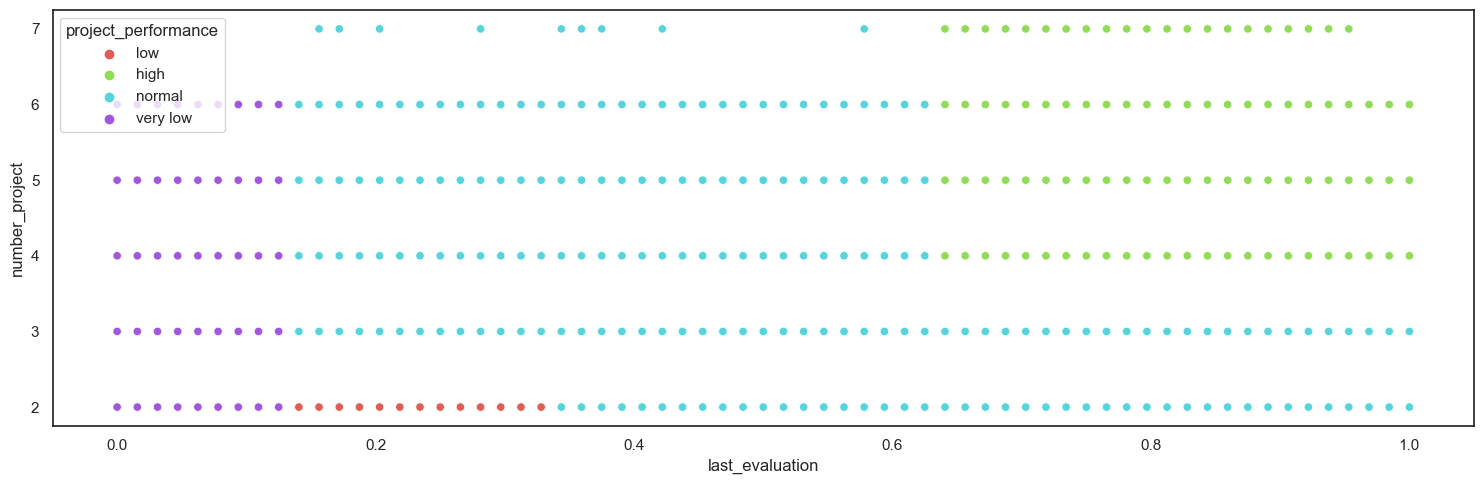

In [85]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr_fe.last_evaluation,
                y=hr_fe.number_project,
                hue=hr_fe.project_performance,
                palette = sns.color_palette("hls", 4))
plt.tight_layout()